# Visualizando dados RIDE

In [39]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 2000)

# Lendo os dados referentes ao mês de Janeiro de 2013

In [4]:
df = pd.read_csv('/home/marcos/Desktop/dados_teste/clean_data/201303.csv')
del df['VALOR_PARCELA']
del df['MES_REFERENCIA']
del df['NOME_FAVORECIDO']
#MES_REFERENCIA = 201303

In [5]:
df.head()

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
0,201209,DF,9701,BRASILIA,16129643064
1,201209,DF,9701,BRASILIA,16476322398
2,201209,DF,9701,BRASILIA,16417040640
3,201210,DF,9701,BRASILIA,16129643064
4,201210,DF,9701,BRASILIA,16476322398


## Informações sobre o dataframe

In [6]:
df = df.astype('category') #MUDANDO O DATAFRAME DE NUMERIC PARA CATEGORICAL

In [7]:
df.describe(include='all')

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
count,198963,198963,198963,198963,198963
unique,7,3,34,34,198006
top,201303,GO,9701,BRASILIA,16410149051
freq,198028,98389,91121,91121,7


In [8]:
df2 = df.set_index('NIS_FAVORECIDO')
df2.head()
#df2.loc['16437903555']


,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO
NIS_FAVORECIDO,,,,
16129643064,201209,DF,9701,BRASILIA
16476322398,201209,DF,9701,BRASILIA
16417040640,201209,DF,9701,BRASILIA
16129643064,201210,DF,9701,BRASILIA
16476322398,201210,DF,9701,BRASILIA


## Agrupando o datagrame por UF E NIS

In [9]:
df3 = df.set_index('NIS_FAVORECIDO')
gp = df3.groupby(['UF'])

In [10]:
df3.query('UF =="UF"')

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO
NIS_FAVORECIDO,,,,


In [11]:
gp.head(1)

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO
NIS_FAVORECIDO,,,,
16129643064,201209,DF,9701,BRASILIA
16410149051,201209,GO,9211,ALTO PARAISO DE GOIAS
12876546983,201209,MG,578,CABECEIRA GRANDE


In [12]:
del df3['MES_COMPETENCIA']

In [13]:
gp = df3.groupby(['UF'])

In [14]:
gp.head(1)

,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO
NIS_FAVORECIDO,,,
16129643064,DF,9701,BRASILIA
16410149051,GO,9211,ALTO PARAISO DE GOIAS
12876546983,MG,578,CABECEIRA GRANDE


In [19]:
df4 = df3

In [22]:
df4.head(3)

,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO
NIS_FAVORECIDO,,,
16129643064,DF,9701,BRASILIA
16476322398,DF,9701,BRASILIA
16417040640,DF,9701,BRASILIA


In [29]:
df4.groupby('UF').count()

,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO
UF,,
DF,91121,91121
GO,98389,98389
MG,9453,9453


In [30]:
df4['QTD_ESTADO'] = 0

In [31]:
df4.groupby('UF').count()

,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,QTD_ESTADO
UF,,,
DF,91121,91121,91121
GO,98389,98389,98389
MG,9453,9453,9453


In [37]:
#del df4['CODIGO_MUNICIPIO_SIAFI']
#del df4['NOME_MUNICIPIO']
df4.groupby('UF').count()

,QTD_ESTADO
UF,
DF,91121
GO,98389
MG,9453


In [51]:
estados = ['DF','GO','MG']


TypeError: only size-1 arrays can be converted to Python scalars

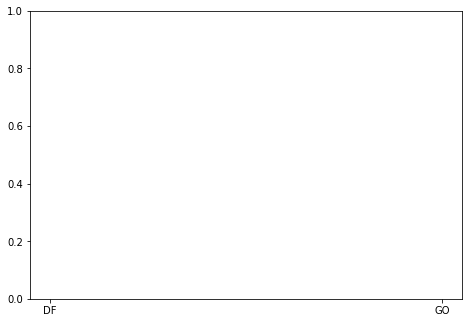

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(estados,df4.groupby('UF').count())
plt.show()